# Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Step 1:
- Import the boston house dataset from `sklearn.datasets`. 

`from sklearn.datasets import load_boston`

`boston = load_boston()`

- Create train and test datasets. 

- Check the data description and familiarize yourself with the data.

In [2]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()

c:\Coding\conda\envs\datsci\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing datase

In [3]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
columnsdict = {'CRIM': 'Crime Rate per Cap', 
    'ZN': '% Zoned >25k sqft', 
    'INDUS': '% Non-Retail Business', 
    'NOX': 'NO Concentration pp10m', 
    'RM':'Avg Rooms per Home', 
    'AGE': '% Units Built <1940', 
    'DIS': 'Dist to Employment Centers', 
    'RAD': 'Accessability to Radial Highways', 
    'TAX': 'Property-Tax Rate per $10k',
    'PTRATIO': 'Pupil-Teacher Ratio', 
    'B': 'Black Pop Coeff', 
    'LSTAT': '% of Pop Lower Status'}

In [5]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston_medv = boston_dataset.target
display(boston)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [6]:
X = boston.copy()
y = boston_medv.copy()
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

### Step 2:
Create a scatter plot of each attribute with the ~~mean~~ median house price.

In [8]:
df = X_train.copy()
df['MedV'] = y_train

In [9]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MedV
384,20.08490,0.0,18.10,0.0,0.700,4.368,91.2,1.4395,24.0,666.0,20.2,285.83,30.63,8.8
407,11.95110,0.0,18.10,0.0,0.659,5.608,100.0,1.2852,24.0,666.0,20.2,332.09,12.13,27.9
364,3.47428,0.0,18.10,1.0,0.718,8.780,82.9,1.9047,24.0,666.0,20.2,354.55,5.29,21.9
24,0.75026,0.0,8.14,0.0,0.538,5.924,94.1,4.3996,4.0,307.0,21.0,394.33,16.30,15.6
32,1.38799,0.0,8.14,0.0,0.538,5.950,82.0,3.9900,4.0,307.0,21.0,232.60,27.71,13.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,0.01096,55.0,2.25,0.0,0.389,6.453,31.9,7.3073,1.0,300.0,15.3,394.72,8.23,22.0
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
138,0.24980,0.0,21.89,0.0,0.624,5.857,98.2,1.6686,4.0,437.0,21.2,392.04,21.32,13.3
41,0.12744,0.0,6.91,0.0,0.448,6.770,2.9,5.7209,3.0,233.0,17.9,385.41,4.84,26.6


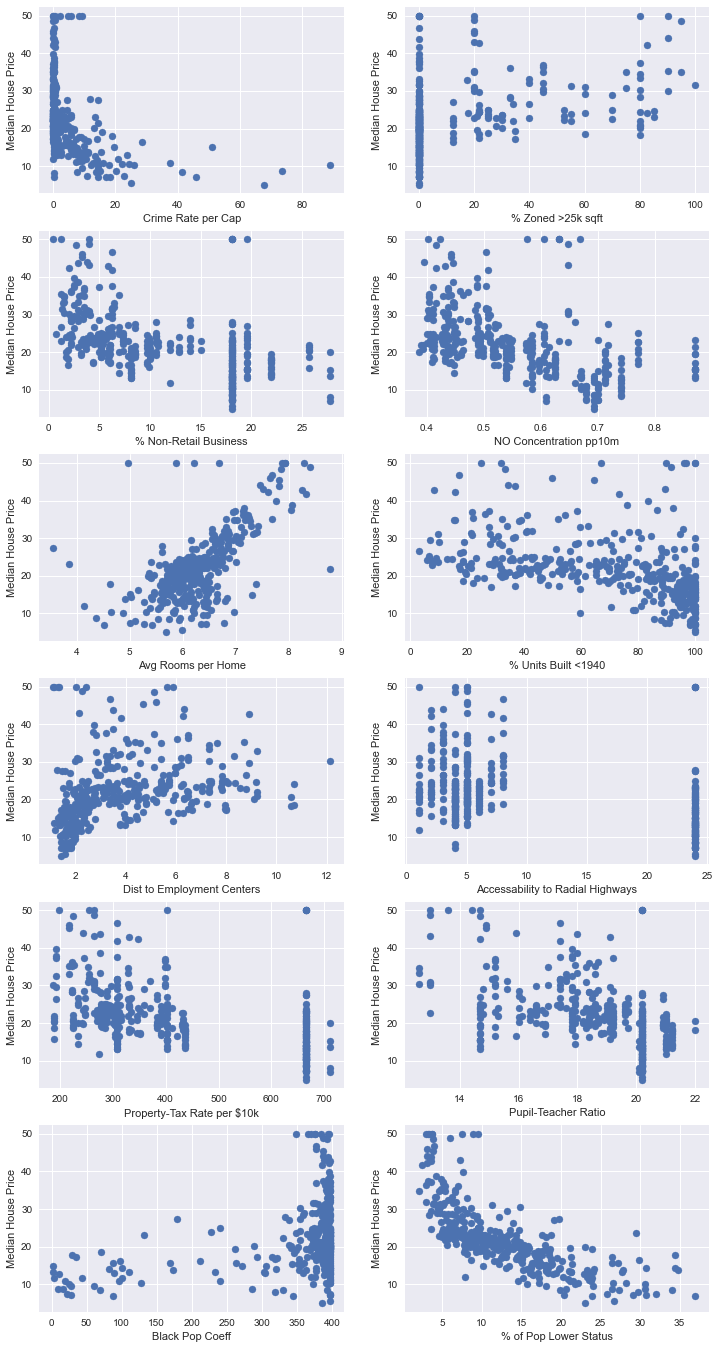

In [10]:
plt.style.use('seaborn')
fig = plt.figure(figsize=(12,24))

for i,col in enumerate(df.drop('CHAS', axis=1).columns[:-1]):
    ax = fig.add_subplot(6,2,i+1)
    ax.set_ylabel('Median House Price')
    ax.set_xlabel(columnsdict[col])
    ax.scatter(X_train[col], y_train)


### Step 3:
Create a box plot of all attributes.

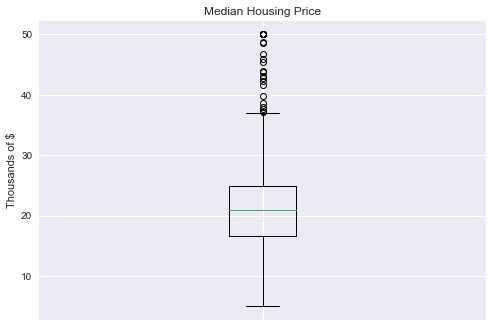

In [11]:
plt.title('Median Housing Price')
plt.tick_params(axis='x', labelsize=0)
plt.ylabel('Thousands of $')
plt.boxplot(y_train)
plt.show()

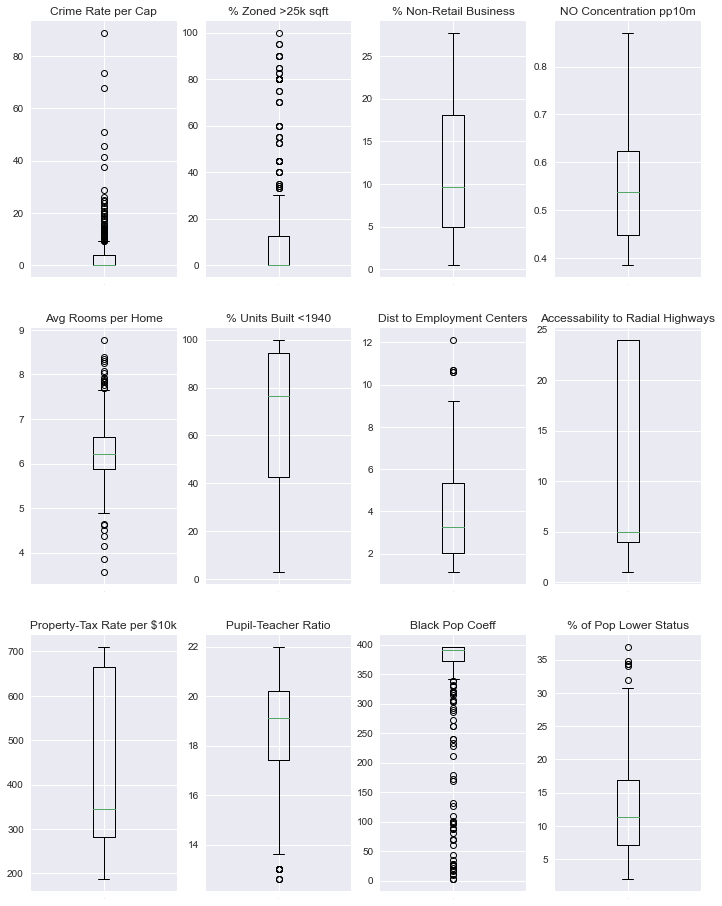

In [12]:
fig = plt.figure(figsize=(12,16))

for i,col in enumerate(df.drop('CHAS', axis=1).columns[:-1]):
    ax = fig.add_subplot(3,4,i+1)
    ax.set_title(columnsdict[col])
    ax.tick_params(axis='x', labelsize=0)
    ax.boxplot(X_train[col])

### Step 4:
Use `StandardScaler()` to scale the trainin data set.

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
384,20.08490,0.0,18.10,0.0,0.700,4.368,91.2,1.4395,24.0,666.0,20.2,285.83,30.63
407,11.95110,0.0,18.10,0.0,0.659,5.608,100.0,1.2852,24.0,666.0,20.2,332.09,12.13
364,3.47428,0.0,18.10,1.0,0.718,8.780,82.9,1.9047,24.0,666.0,20.2,354.55,5.29
24,0.75026,0.0,8.14,0.0,0.538,5.924,94.1,4.3996,4.0,307.0,21.0,394.33,16.30
32,1.38799,0.0,8.14,0.0,0.538,5.950,82.0,3.9900,4.0,307.0,21.0,232.60,27.71


In [15]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
df1 = df.copy().iloc[:,:-1]
df1.iloc[:,:] = X_train_scaled
df1.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
384,1.712817,-0.489112,0.982463,-0.242197,1.232893,-2.807762,0.811112,-1.089389,1.637617,1.494702,0.778403,-0.761223,2.528261
407,0.850161,-0.489112,0.982463,-0.242197,0.884499,-0.973754,1.118597,-1.159099,1.637617,1.494702,0.778403,-0.255291,-0.074227
364,-0.048875,-0.489112,0.982463,4.128876,1.385847,3.717757,0.521098,-0.879220,1.637617,1.494702,0.778403,-0.009653,-1.036445
24,-0.337779,-0.489112,-0.429928,-0.242197,-0.143687,-0.506378,0.912442,0.247930,-0.638352,-0.627611,1.152076,0.425410,0.512387
32,-0.270143,-0.489112,-0.429928,-0.242197,-0.143687,-0.467923,0.489651,0.062880,-0.638352,-0.627611,1.152076,-1.343384,2.117490


### Step 5:
Use `KNeighborsRegressor()` to fit both not-scaled and scaled datasets. Check the scores of test dataset for both models.

In [17]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

In [18]:
reg = KNeighborsRegressor(n_neighbors=5)

In [19]:
scores1 = cross_val_score(reg, X_train, y_train, cv=10)
print('Non-scaled (train CV): ', np.mean(scores1))

scores2 = cross_val_score(reg, X_train_scaled, y_train, cv=10)
print('Scaled (train CV): ', np.mean(scores2))


Non-scaled (train CV):  0.4999713504765803
Scaled (train CV):  0.7310632078369949


In [20]:
reg.fit(X_train, y_train)
print('Non-scaled (train):', reg.score(X_train, y_train))

reg.fit(X_train_scaled, y_train)
print('Scaled (train):', reg.score(X_train_scaled, y_train))


Non-scaled (train): 0.7002319985262201
Scaled (train): 0.8249022285925915


In [21]:
reg.fit(X_train, y_train)
print('Non-scaled (test):', reg.score(X_test, y_test))

reg.fit(X_train_scaled, y_train)
print('Scaled (test):', reg.score(X_test_scaled, y_test))


Non-scaled (test): 0.40114984950820953
Scaled (test): 0.7536276516315816


### Step 6:
Repeat Step 5 for `RandomForestRegressor`. Use

`RandomForestRegressor(n_estimators=100, random_state=0)`

In [22]:
from sklearn.ensemble import RandomForestRegressor

In [23]:
rfr = RandomForestRegressor(n_estimators=100, random_state=0)

In [24]:
scores1 = cross_val_score(rfr, X_train, y_train, cv=10)
print('Non-scaled (train CV): ', np.mean(scores1))

scores2 = cross_val_score(rfr, X_train_scaled, y_train, cv=10)
print('Scaled (train CV): ', np.mean(scores2))


Non-scaled (train CV):  0.8465015554635256
Scaled (train CV):  0.8465962916553009


In [25]:
rfr.fit(X_train, y_train)
print('Non-scaled (train):', rfr.score(X_train, y_train))

rfr.fit(X_train_scaled, y_train)
print('Scaled (train):', rfr.score(X_train_scaled, y_train))

Non-scaled (train): 0.9802660053514034
Scaled (train): 0.980289635366393


In [26]:
rfr.fit(X_train, y_train)
print('Non-scaled (test):', rfr.score(X_test, y_test))

rfr.fit(X_train_scaled, y_train)
print('Scaled (test):', rfr.score(X_test_scaled, y_test))


Non-scaled (test): 0.8998340791017709
Scaled (test): 0.8999318919611741
